In [2]:
import seaborn as sns
import torch

import pyro
import pyro.distributions as dist

from rethinking import MAP, precis

# 2.1

attachment:image.png
<img src=attachment:image.png width="500"/>
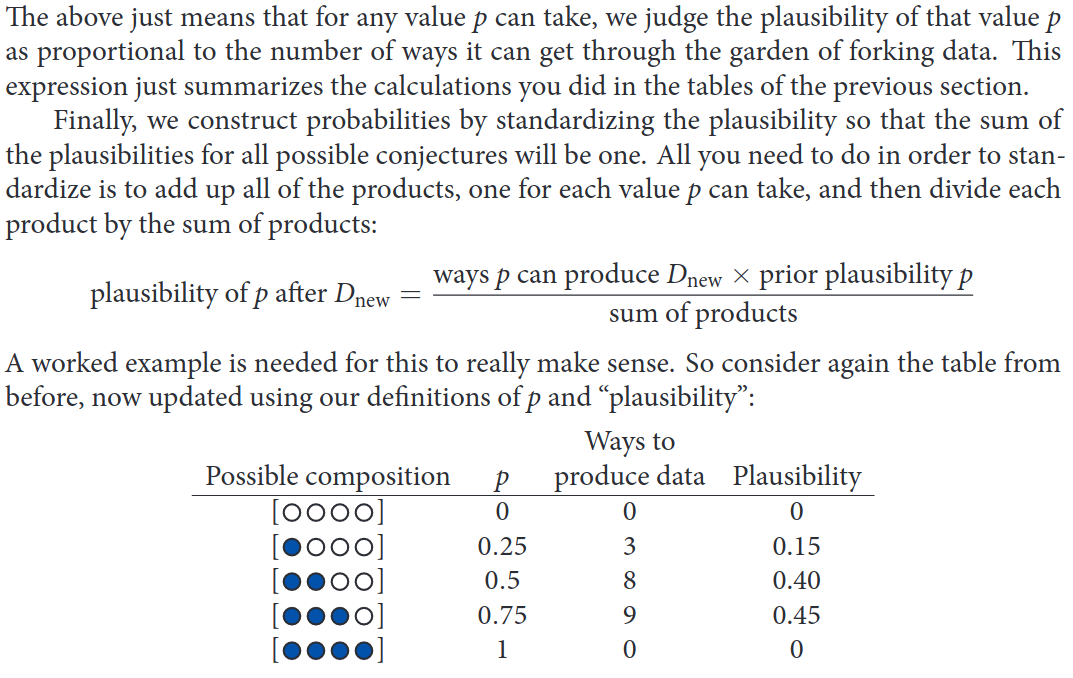

In [5]:
ways = torch.tensor([0., 3., 8., 9., 0.])
ways / ways.sum()

tensor([0.0000, 0.1500, 0.4000, 0.4500, 0.0000])

- Conjectured proportions (like the blue marbles) _p_ is usually called a **parameter** value, i.e. indexing possible explanations of the data.

- Relative number of ways that _p_ can produce the data is usually called a **likelihood**, i.e. enumarting all possible data sequences after eliminating sequences inconsistent with the data.

- Prior plausibility of any specific _p_ is usually called the **prior probability**

- New, updated plausibility of any specific _p_ is usually called the **posterior probability**.

# 2.3

Translating what was previously counted into their direct analogs in conventional probability theory:

- 1 The number of ways each conjecture could produce an observation
- 2 The accumulated number of ways each conjecture could produce the entire data
- 3 The initial plausibility of each conjectured cause of the data

These distributions and devices are:
- 1 Lkelihood function
- 2 One or more paramters
- 3 A prior

**Likelihood** needs to tell you the probability of any possible observation, for any possible state of the (small) world, such as a proportion of water on a globe.


In [8]:
# calculate for a binomial the likelihood of the data - six Ws in nine tosses - under any value of p
dist.Binomial(total_count=9, probs=0.5).log_prob(torch.tensor(6.)).exp()

tensor(0.1641)

**Parameters** represent the different conjectures for causes or explanations of the data.

For every parameter you intend your Bayesian machine to estimate, you must provide to the machine a **prior** for it to have an initial plausibility assignment for each possible value of the paramters.

The relative plausbility of different parameter values, conditional on the data, are known as the **posterior distribution**.

The procedure behind the posterior distribution is **Bayes' theorem**. Remember that:

$Pr(w,p) = Pr(w|p)Pr(p)$, which equals $Pr(w,p) = Pr(p|w)Pr(w)$

_(e.g. probability of rain, when it's cold, times the probability that it's cold, or the other way around: probability of it being cold, when it's raining, times the probability of it raining)_

And solving for the posterior probability $Pr(p|w)$: $Pr(p|w) = \frac{Pr(w|p)Pr(p)}{Pr(w)}$, and we commonly write this as: $Posterior = \frac{Likelihood x Prior}{Average likelihood}$.

The key lesson is that the posterior is proportional to the product of the prior and the
likelihood. Why? Because the number of paths through the garden of forking data is the
product of the prior number of paths and the new number of paths. The likelihood indi-
cates the number of paths, and the prior indicates the prior number

# 2.4

Three different conditioning engines, numerical techniques for computing posterior distributions:
 - (1) Grid approximation
 - (2) Quadratic approximation
 - (3) Markov chain Monte Carlo (MCMC)
 

**Grid approximation** simplifies continuous parameters by only considering a finite grid of parameter values. At any particular value of a parameter _p'_, the posterior probability is simply calculated as: multiply the prior probability of _p'_ by the likelihood at _p'_.

- (1) Define the grid. This means you decide how many points to use in estimating the
posterior, and then you make a list of the parameter values on the grid.
- (2) Compute the value of the prior at each parameter value on the grid.
- (3) Compute the likelihood at each parameter value.
- (4) Compute the unstandardized posterior at each parameter value, by multiplying the prior by the likelihood
- (5) Finally, standardize the posterior, by dividing each value by the sum of all values.

In [10]:
# define grid
p_grid = torch.linspace(start=0, end=1, steps=20)
print(p_grid)

# define prior
prior = torch.tensor(1.).repeat(20)
print(prior)

# compute likelihood at each value in grid
likelihood = dist.Binomial(total_count=9,
                          probs = p_grid).log_prob(torch.tensor(6.)).exp()
print(likelihood)

# compute product of likelihood and prior
unstd_posterior = likelihood * prior
print(unstd_posterior)

# standardize the posterior, to make it sum to 1
posterior = unstd_posterior / unstd_posterior.sum()
print(posterior)

tensor([0.0000, 0.0526, 0.1053, 0.1579, 0.2105, 0.2632, 0.3158, 0.3684, 0.4211,
        0.4737, 0.5263, 0.5789, 0.6316, 0.6842, 0.7368, 0.7895, 0.8421, 0.8947,
        0.9474, 1.0000])
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.])
tensor([2.4107e-40, 1.5181e-06, 8.1851e-05, 7.7729e-04, 3.5986e-03, 1.1161e-02,
        2.6683e-02, 5.2921e-02, 9.0827e-02, 1.3834e-01, 1.8977e-01, 2.3611e-01,
        2.6661e-01, 2.7140e-01, 2.4501e-01, 1.8977e-01, 1.1792e-01, 5.0267e-02,
        8.8538e-03, 1.4230e-19])
tensor([2.4107e-40, 1.5181e-06, 8.1851e-05, 7.7729e-04, 3.5986e-03, 1.1161e-02,
        2.6683e-02, 5.2921e-02, 9.0827e-02, 1.3834e-01, 1.8977e-01, 2.3611e-01,
        2.6661e-01, 2.7140e-01, 2.4501e-01, 1.8977e-01, 1.1792e-01, 5.0267e-02,
        8.8538e-03, 1.4230e-19])
tensor([1.2687e-40, 7.9898e-07, 4.3077e-05, 4.0908e-04, 1.8939e-03, 5.8739e-03,
        1.4043e-02, 2.7852e-02, 4.7801e-02, 7.2807e-02, 9.9873e-02, 1.2426e-01,
        1.40

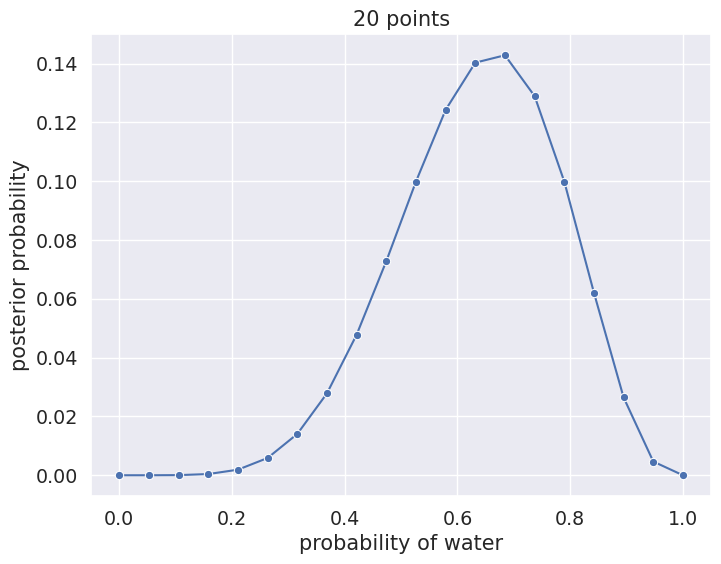

In [19]:
ax = sns.lineplot(x=p_grid, y=posterior, marker="o")
ax.set(xlabel="probability of water", ylabel="posterior probability",
       title="20 points");

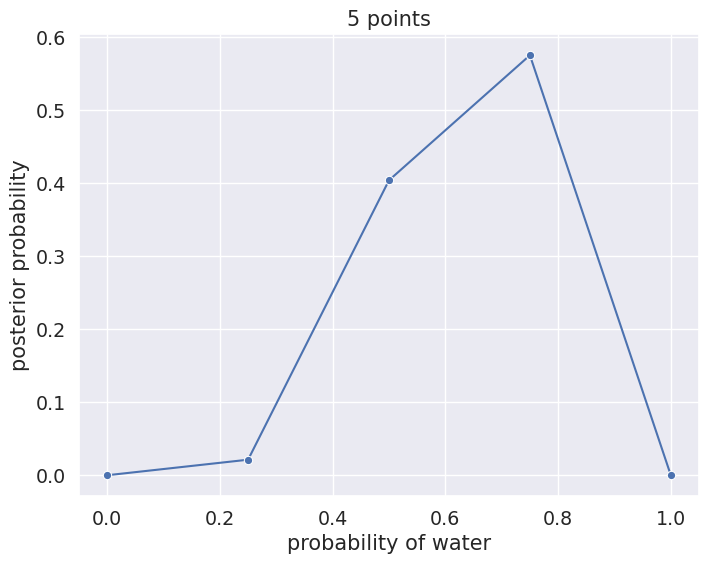

In [27]:
# define grid
p_grid = torch.linspace(start=0, end=1, steps=5)
# define prior
prior = torch.tensor(1.).repeat(5)
# compute likelihood at each value in grid
likelihood = dist.Binomial(total_count=9,
                          probs = p_grid).log_prob(torch.tensor(6.)).exp()
# compute product of likelihood and prior
unstd_posterior = likelihood * prior
# standardize the posterior, to make it sum to 1
posterior = unstd_posterior / unstd_posterior.sum()
ax = sns.lineplot(x=p_grid, y=posterior, marker="o")
ax.set(xlabel="probability of water", ylabel="posterior probability",
       title="5 points");

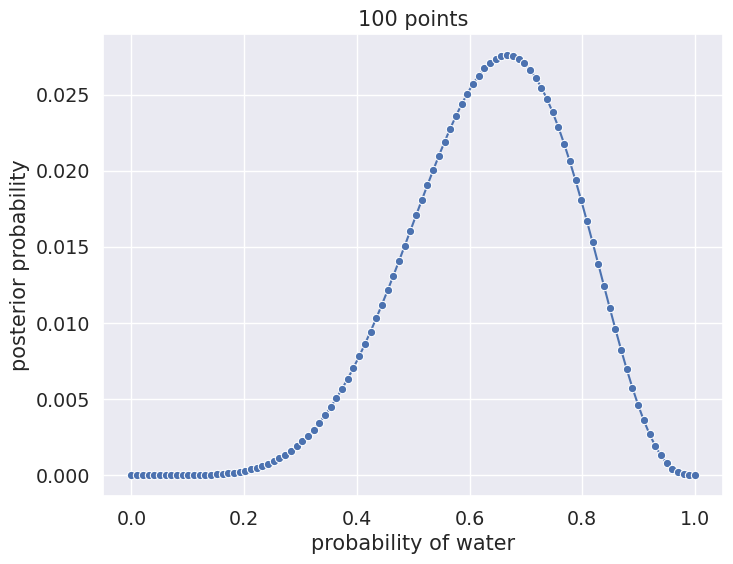

In [28]:
# define grid
p_grid = torch.linspace(start=0, end=1, steps=100)
# define prior
prior = torch.tensor(1.).repeat(100)
# compute likelihood at each value in grid
likelihood = dist.Binomial(total_count=9,
                          probs = p_grid).log_prob(torch.tensor(6.)).exp()
# compute product of likelihood and prior
unstd_posterior = likelihood * prior
# standardize the posterior, to make it sum to 1
posterior = unstd_posterior / unstd_posterior.sum()
ax = sns.lineplot(x=p_grid, y=posterior, marker="o")
ax.set(xlabel="probability of water", ylabel="posterior probability",
       title="100 points");